In [24]:
%matplotlib inline
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

apellido = 'NOVALES'
conn = psycopg2.connect(database="Test1", user="postgres", password="232686", host="localhost", port="5432")

In [25]:
gdf_comunas = gpd.read_file('COMUNA/COMUNAS_2020.shp')
gdf_comunas = gdf_comunas[ (gdf_comunas.PROVINCIA == 'Osorno')]
gdf_comunas = gdf_comunas.drop(columns=['CUT_REG', 'CUT_PROV', 'REGION', 'PROVINCIA', 'SUPERFICIE'])
gdf_comunas['centroid'] = gdf_comunas['geometry'].centroid


df = pd.read_sql(f"SELECT \"CUT\", COUNT(*)  FROM \"PADRON\".\"BASE_SERVEL\" WHERE (\"PROVINCIA\" = 'OSORNO') AND \"NOMBRE_COMPLETO\" LIKE '% {apellido} %' GROUP BY \"CUT\"", conn)

gdf_comunas = gdf_comunas.join(df.set_index('CUT'), on='CUT_COM')
gdf_comunas['count'] = gdf_comunas['count'].fillna(0)

<ipython-input-25-87ad0dd91647>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_comunas['centroid'] = gdf_comunas['geometry'].centroid


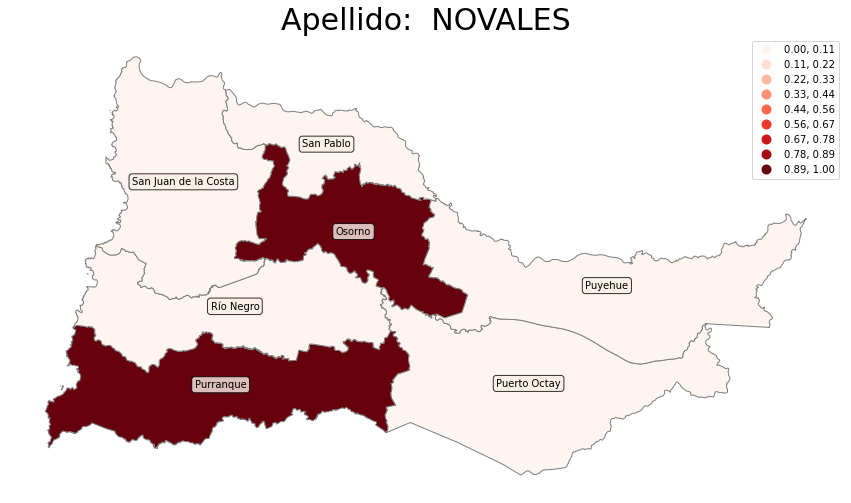

In [26]:
figsize = (15, 15)

fig, ax = plt.subplots(1, figsize=figsize)

gdf_comunas.plot(column='count',  # columna para categorizar
                 edgecolor='grey',
                 cmap='Reds',
                 scheme='equal_interval',
                 k=9,
                 legend=True,
                 ax=ax)
plt.title(f'Apellido:  {apellido}',
               fontdict={'fontsize': '30',
                         'fontweight' : '7'})
props = dict(boxstyle='round', facecolor='linen', alpha=0.8)
for point in gdf_comunas.iterrows():
    ax.text(point[1]['centroid'].x,
            point[1]['centroid'].y,
            point[1]['COMUNA'],
            horizontalalignment='center',
            fontsize=10,
            bbox=props)
ax.axis('off')
plt.show()
